# Introduction

## Aims and Goals

The goal of this project is to analyse biodiversity data from the National Parks Service. Various species will investigated in different national park locations.

The project will aim to provide answers to the following questions:
1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Is there a correlation between species and their conversation status?
4. Which animal is the most common and what is their distribution amongst parks?


## Data Source
Both Species_info.csv and Observations.csv provided by [Codecademy.com](https://www.codecademy.com/).

Note: The data is mostly fictional and does the represent real life data.

## Project Scoping

### Project Goals
The project goal is to examine biodiversity data  for the National Parks Service. It should provide insight what is expected from a data analyst on a day to day basis and what tools and methodologies to deploy approrpriately. The project aims to understand the relationship between species and their conservation status. The following questions will provide a guide for this project:
1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Is there a correlation between species and their conversation status?
4. Which animal is the most common and what is their distribution amongst parks?

### Data
The Species_info.csv file contains information about each species. The observations.csv file conatains information on observations of species within the park locations. This data will be examined and aim to provide answers to the project goals.

### Analysis
Appropriate descriptive statistics and data visualisation techniques will be used to analyse and understand the data. Inferential statistics will be used as descriptive statistics will not be enough to answer the project goal questions alone.

### Evaluation
The final section will outline a conclusion. The conclusion will aim to answer the project goal questions including any limitations of the methodologies deployed and if any any improvement could be made. Any further research suggested will be mentioned.

## Import Python Modules

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
%matplotlib inline

## Loading the Data

### Species

In [37]:
species = pd.read_csv("Species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [38]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


#### Species Columns
- **category** - Taxonomy for each species
- **scientific_name** - The scientific name for each species
- **common_names** - The common names of each species
- **conversation_status** - The conservation status for each species

### Observations

In [39]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [40]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


#### Observations columns
- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

## Explore the Data

This section we will explore the surface of the data. The following statement below prints the number of unique species which is 5541.

In [41]:
print(f"Number of Species:{species.scientific_name.nunique()}")

Number of Species:5541


The following print statements below prints the number of unique number of categories, including the available categories within the dataset. There are a total of 7 unique categories being: Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant and Nonvascular Plant.

In [42]:
print(f"Number of Categories:{species.category.nunique()}")
print(f"Unique Categories:{species.category.unique()}")

Number of Categories:7
Unique Categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


The following statement examines the number of species grouped by category. Vascular plants have the highest share of species making up 80% whilst reptiles being the fewest at 0.01%.

In [43]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

The following statements examines the conservation status. There are a total of 4 unique conservation statuses being: Species of Concern, Endangered, Threatened, In Recovery and nan values.

In [44]:
print(f"Number of conservation statuses:{species.conservation_status.nunique()}")
print(f"Unique conservation statuses:{species.conservation_status.unique()}")

Number of conservation statuses:4
Unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


The following statement examines the number of observations in each category of conservation status. The number of na values is 5633. That means that many species are not a cause for concern. However, there are 161 species of concern, 16 endangered, 4 in recovery and 10 threatened.

In [45]:
print(f"na values:{species.conservation_status.isna().sum()}")

na values:5633


In [46]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

### Observations Data

The following statements examines the park name. There are a total of 4 unique parks being: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park.

In [47]:
print(f"Number of Parks:{observations.park_name.nunique()}")
print(f"Unique Parks:{observations.park_name.unique()}")

Number of Parks:4
Unique Parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


The following statement examines the number of observations made in each park over the last 7 days. There was a total of 3,314,739 observations made.

In [48]:
print(f"Number of Observations:{observations.observations.sum()}")

Number of Observations:3314739


## Analysis

This section will dive deeper into the data. The following statement will look at the conservation status column and its values.

The conservation_status column has the following values:
- Species of Concern: is conserved to prevent near threatened, certain events may lead it to being a higher risk level.
- Threatened: likely to be endangered in the near future.
- Endangered: higher risk of extinction in the wild.
- In Recovery: formerly Endangered, but neither in danger of extinction.

During surface level exploration, 5633 nan values were found. These values can be converted to Least Concern. Least concern meaning the species does not qualify for a higher risk category and not likely to be threatened in the near future, in conservation terms.

In [49]:
species.fillna('Least Concern', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Least Concern         5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to explore all categories in conservation status excluding the least concern species.

Looking at the table, there are a lot of species of concern. There are 7 mammals and 4 birds endangered. There is 1 mammal and 3 birds in recovery. This suggests birds are making a better recovery than mammals.

In [50]:
conservationCategories = species[species.conservation_status != "Least Concern"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategories

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


### How many species are protected?

Next is to explore the percentage of species that are protected. This can answer our question "Are a certain type of species more likely to be endangered?". First we need to create a new column which counts the number of protected species vs non-protected species.

In [51]:
species['is_protected'] = species.conservation_status != "Least Concern"

The following table shows that birds, mammals and vascular plants are the most protected species.

In [52]:
protected_counts = species.groupby(['category', 'is_protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_protected',
          index="category",
          values="scientific_name")\
    .reset_index()

protected_counts.columns = ['category', 'not_protected', 'protected']

protected_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


The following tables shows the percent of species protected. Both mammals and birds are the most protected, both account for ~17% and ~15% respectively.

In [53]:
protected_counts['percent_protected '] = protected_counts.protected / \
                                        (protected_counts.protected + protected_counts.not_protected) * 100

protected_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Chi-squared Tests

This section will look at the statistical significant differences in the conservation status rates. Below is the contingency table format:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|X|?|?|



### Mammals & Birds

The p-value returned was **0.69**. The alpha value for this Chi-squared test is 0.05, and is a standard p-value to test statistical significance. The returned p-value is much greater than the standard p-value, therefore we can assume the variables are independent and there is no significant relationship between mammals and birds.

In [68]:
contingency_one = [[30, 146], [75, 413]]
stat, p, dof, expected = chi2_contingency(contingency_one)
chi2_contingency(contingency_one)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [69]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent. There is a significant relationship between mammals and birds.')
else:
    print('Independent. There is no significant relationship between mammals and birds.')

p value is 0.6875948096661336
Independent. There is no significant relationship between mammals and birds.


### Mammals & Reptiles

The next test pair will be between mammals and reptiles. The p-value returned was **0.038** which is less than the standard p-value therefore we can assume the variables are dependent and there is a significant relationship between mammals and reptiles.

In [70]:
contingency_two = [[30, 146], [5, 73]]
stat, p, dof, expected = chi2_contingency(contingency_two)
chi2_contingency(contingency_two)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [59]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent. There is a significant relationship between mammals and reptiles.')
else:
    print('Independent. There is no significant relationship between mammals and reptiles.')

p value is 0.03835559022969898
Dependent. There is a significant relationship between mammals and reptiles.


### Mammals & Amphibians

The next test pair will be between mammals and amphibians. The p-value returned was **0.12** which is greater than the standard p-value therefore we can assume the variables are independent and there is no significant relationship between mammals and amphibians.

In [60]:
contingency_three = [[30, 146], [7, 72]]
stat, p, dof, expected = chi2_contingency(contingency_three)
chi2_contingency(contingency_three)

Chi2ContingencyResult(statistic=2.321746712946015, pvalue=0.12757669693198975, dof=1, expected_freq=array([[ 25.5372549, 150.4627451],
       [ 11.4627451,  67.5372549]]))

In [61]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent. There is a significant relationship between mammals and amphibians.')
else:
    print('Independent. There is no significant relationship between mammals and amphibians.')

p value is 0.12757669693198975
Independent. There is no significant relationship between mammals and amphibians.


### Mammals & Fish

The next test pair will be between mammals and fish. The p-value returned was **0.056** which is greater than the standard p-value therefore we can assume the variables are independent and there is no significant relationship between mammals and fish.

In [71]:
contingency_four = [[30, 146], [11, 115]]
stat, p, dof, expected = chi2_contingency(contingency_four)
chi2_contingency(contingency_four)

Chi2ContingencyResult(statistic=3.647651024981415, pvalue=0.0561483484489001, dof=1, expected_freq=array([[ 23.89403974, 152.10596026],
       [ 17.10596026, 108.89403974]]))

In [63]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent. There is a significant relationship between mammals and fish.')
else:
    print('Independent. There is no significant relationship between mammals and fish.')

p value is 0.0561483484489001
Independent. There is no significant relationship between mammals and fish.


### Mammals and Nonvascular Plants

The next test pair will be between mammals and nonvascular plants. The p-value returned was **less** than the standard p-value therefore we can assume the variables are dependent and there is a significant relationship between mammals and nonvascular plants.

In [64]:
contingency_five = [[30, 146], [5, 328]]
stat, p, dof, expected = chi2_contingency(contingency_five)
chi2_contingency(contingency_five)

Chi2ContingencyResult(statistic=41.0526001992972, pvalue=1.481868915759314e-10, dof=1, expected_freq=array([[ 12.1021611, 163.8978389],
       [ 22.8978389, 310.1021611]]))

In [65]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent. There is a significant relationship between mammals and nonvascular plants.')
else:
    print('Independent. There is no significant relationship between mammals and nonvascular plants.')

p value is 1.481868915759314e-10
Dependent. There is a significant relationship between mammals and nonvascular plants.


### Mammals & Vascular Plants

The next test pair will be between mammals and vascular plants. The p-value returned was **less** than the standard p-value therefore we can assume the variables are dependent and there is a significant relationship between mammals and vascular plants.

In [66]:
contingency_six = [[30, 146], [46, 4216]]
stat, p, dof, expected = chi2_contingency(contingency_six)
chi2_contingency(contingency_six)

Chi2ContingencyResult(statistic=246.5870424874456, pvalue=1.4405067309854046e-55, dof=1, expected_freq=array([[3.01397026e+00, 1.72986030e+02],
       [7.29860297e+01, 4.18901397e+03]]))

In [67]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent. There is a significant relationship between mammals and vascular plants.')
else:
    print('Independent. There is no significant relationship between mammals and vascular plants.')

p value is 1.4405067309854046e-55
Dependent. There is a significant relationship between mammals and vascular plants.


### Species in Parks

This next section we will aim to answer the final question in your introduction. We will look at the number of sightings of different species at several national parks over the past 7 days.

We need to find the the most prevalent animals by looking at the common names from species.

In [74]:
# import the chain function from itertools modules - allows you to chain together iterables into a single iterable
from itertools import chain
# import string module which provides a collection of string constants and utility functions for working with strings
import string

In [78]:
print(species.common_names)

0                                Gapper's Red-Backed Vole
1                                   American Bison, Bison
2       Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3       Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                           Wapiti Or Elk
                              ...                        
5819                                  Parish's Nightshade
5820              Chaparral Nightshade, Purple Nightshade
5821          Thicket Creeper, Virginia Creeper, Woodbine
5822              California Grape, California Wild Grape
5823    Bullhead, Caltrop, Goathead, Mexican Sandbur, ...
Name: common_names, Length: 5824, dtype: object


We need to filter Species to include only rows where the category is "Mammal", remove the punctuation from the common names rows and split the cleaned common names strings into a list of words. The following statements achieves this:

In [84]:
# Define a function which removes the punctuation
# Takes a single argument as text. Iterates over each character in string.punctuation string.
#The loop replaces each occurrence of the current punctuation character in the text string with an empty string
# Then returns the modified text string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Filters species to include only rows where the category is equaled to Mammal
# Selects the common_names column from the FILTERED DataFrame
# Applies the remove_punctuation function to each element of the common_names column (Removing the punctuation from each string)
# Splits each string in the common_names column into a list of words
# Converts the Series of lists into a Python list of lists
common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().to_list()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next is to remove any duplicates from the list of lists.

In [90]:
# Initialise empty list
removedDupes = []

# Loop iterates over common_Names list of lists
# Creates a new list called item which contains only unique names of the animals. A dictionary is created where the name is the key
# list() converts the new dictionary back to a list
# Appends the new item list to the removedDupes empty list
for animal in common_Names:
    item = list(dict.fromkeys(animal))
    removedDupes.append(item)

removedDupes[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next is to make a list from a list of lists.

In [92]:
# Iterates over each element i in the previous removedDupes list of lists
# If i is in a list, it is returned unchanged, if not [i] is returned, wrapping the non-list element 'i' into a list
# chain.from.iterable is a function from itertools module used to flatten the created list of lists into a single iterable
# The resulting interator is then converted into a list
flattenedList = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in removedDupes))
flattenedList[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Refering back to the question, "Which animal is the most common and what is their distribution amongst parks?", we need to count the number of observations made for each animal. From the new DataFrame, we can see the Bat is the most observed animal across the span of 7 days in different national parks. We can use this information to dive deeper into the Bat, and figure out the distribution amongst the parks.

In [94]:
# Initialise an empty list
animal_count = []

# For loop
# Iterates over each element animal in flattenedList
# Then counts the number of animals observed  of the current animal in the flattenedList and assigns the count to x
# Appends a tuple to the empty animal_count list
for animal in flattenedList:
    x = flattenedList.count(animal)
    animal_count.append((animal, x))
    
# Creates a new DataFrame from the unique animals of animal_count
# set() removes any tuples and converts back to a list
# Resulting in a DataFrame with two columns: Animal and Count
# The DataFrame is then sorted from highest to lowest count
pd.DataFrame(set(animal_count),
            columns =['Animal', 'Count'])\
            .sort_values('Count', ascending = False)\
            .head(5)

,Animal,Count
201,Bat,23
124,Shrew,18
21,Myotis,17
127,Mouse,16
69,Chipmunk,13


Next is to isolate a subset of data which only refers to bats.

In [97]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Least Concern,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Least Concern,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [98]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Least Concern,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Least Concern,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Least Concern,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Least Concern,False,True


Next we need to merge the subset for bats with observations to create a new DataFrame where bats are observed across all four national parks.

In [100]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Least Concern,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


We need to figure out how many total bat observations were made in each national park. The following statement will show the total number of bats observed in each park ove the past 7 days.

In [101]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Yellowstone National Park has the largest observations made with 8362. Great Smoky Mountains National Park has the lowest observations with only 2411.

Next let's dive further into the difference in observations between protected and unprotected bat observations. Bryce National Park, Yellowstone National Park and Yosemite National Park shows signs of more observed protected bats than unprotected. Great Smoky Mountains National park is the only park which doesn't show this. It may mean a great deal of work is being done to protect bats, as it is the most observed animal in comparison to the others.

In [102]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Below is a visualisation of all four parks and their status with protected and unprotected bats. This bar plot may suggest Great Smoky Mountains National Park should put more resources into protecting its bats, as the other 3 National Parks are doing so.

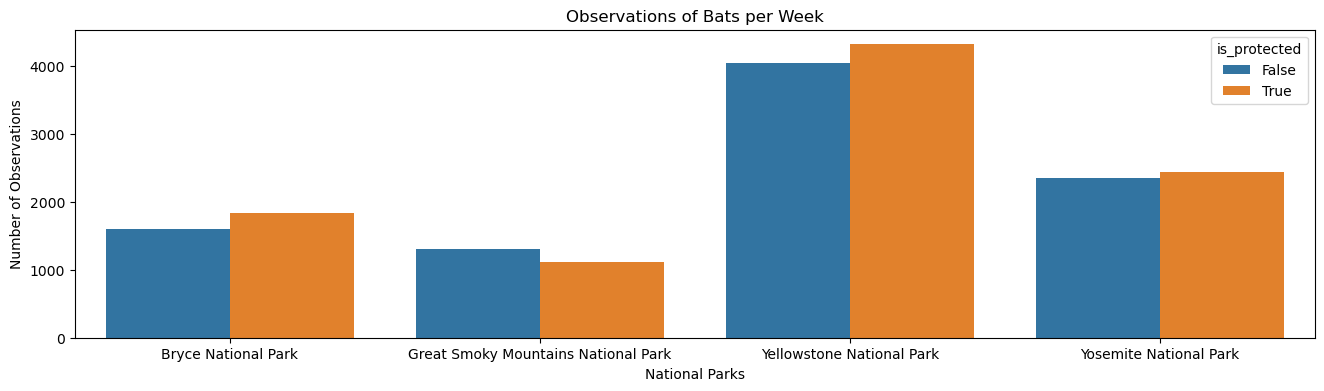

In [103]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusion

The project has demonstrated inferential statistics and data visualisations to gain more perspective into the species that inhabit the four National Parks in the Species dataset.

The following questions can be answered from the introduction:
1. What is the distribution of conservation status for species?
- The large majority of species were not under conservation. 5633 species were not under conservation compared to the 191 that are.
2. Are certain types of species more likely to be endangered?
- Mammals and birds have shown the highest percentage being protected, 17% and 15% respectively.
3. Is there a correlation between species and their conversation status?
- Mammals vs reptiles/nonvascular/vascular plants has shown significant difference in conservation.
4. Which animal is the most common and what is their distribution amongst parks?
- The bat is the most common species observed and a large amount is found at Yellowstone National Park.

## Further Research

The dataset observed the different species across the last 7 days. It would be interesting to see the observations made across the year and perhaps speculate how the seasons could affect said species and their observation counts. The size of each National Park was not mentioned either, therefore different sizes could mean larger or smaller biodiversity amongst parks. Each region of the National Parks could have different types of habitats, favouring certain species over others. It would be interesting to examine the clustering of species in the individual National Parks.